In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import pandas as pd
import os
import random
import torch
import torch.nn as nn
from custommodels import LoadDataset, ResNet50, DenseNet121, MobileNetV2
from training import ModelTrainer

In [2]:
# to reproduce
seed = 42
random.seed(seed)
np.random.seed(seed)
torch.manual_seed(seed)
torch.backends.cudnn.benchmark = False
torch.backends.cudnn.deterministic = True

In [3]:
db = "HAM"
root = f"../../dataset/CAI 2025/{db}/"
df_train = pd.read_csv(f"{root}/dataframe/df_distance_train.csv")
df_valid = pd.read_csv(f"{root}/dataframe/df_distance_valid.csv")
df_test = pd.read_csv(f"{root}/dataframe/df_distance_test.csv")

loader = LoadDataset(label="label", batch_size=8)
train_loader, valid_loader, test_loader = loader.create_dataloaders(df_train, df_valid, df_test)

Width: 200 Height: 150


# DenseNet

In [4]:
models = ["RES", "DENSE", "MOBILE"]

model_save_directory = f"{root}models/{models[1]}/"
if not os.path.exists(model_save_directory):
    os.makedirs(model_save_directory)
    print(f"{model_save_directory} created.")
else:
    print(f"{model_save_directory} aready exist.")
        
df_valid_filepath = f"{root}dataframe/df_valid_{models[1]}.csv"
df_test_filepath = f"{root}dataframe/df_test_{models[1]}.csv"

../../dataset/CAI 2025/HAM/models/DENSE/ aready exist.


/home/kuniko/anaconda3/lib/python3.11/site-packages/torch/autograd/graph.py:744: UserWarning: Plan failed with a cudnnException: CUDNN_BACKEND_EXECUTION_PLAN_DESCRIPTOR: cudnnFinalize Descriptor Failed cudnn_status: CUDNN_STATUS_NOT_SUPPORTED (Triggered internally at ../aten/src/ATen/native/cudnn/Conv_v8.cpp:919.)
  return Variable._execution_engine.run_backward(  # Calls into the C++ engine to run the backward pass


Validation Accuracy: 0.6131 | Loss: 0.8880 | F1: 0.6137
Validation Accuracy: 0.6495 | Loss: 0.8164 | F1: 0.6472
Validation Accuracy: 0.6829 | Loss: 0.7642 | F1: 0.6841
Validation Accuracy: 0.6798 | Loss: 0.7429 | F1: 0.6799
Validation Accuracy: 0.7041 | Loss: 0.7274 | F1: 0.7008
Validation Accuracy: 0.7026 | Loss: 0.7071 | F1: 0.6996
Validation Accuracy: 0.7086 | Loss: 0.6900 | F1: 0.7056
Validation Accuracy: 0.7117 | Loss: 0.6744 | F1: 0.7080
Validation Accuracy: 0.7147 | Loss: 0.6647 | F1: 0.7112
Validation Accuracy: 0.7086 | Loss: 0.6631 | F1: 0.7025
Validation Accuracy: 0.7102 | Loss: 0.6519 | F1: 0.7057
Validation Accuracy: 0.7102 | Loss: 0.6555 | F1: 0.7035
Validation Accuracy: 0.6965 | Loss: 0.6654 | F1: 0.6863
Validation Accuracy: 0.6980 | Loss: 0.6638 | F1: 0.6907
Validation Accuracy: 0.7026 | Loss: 0.6712 | F1: 0.6909
Validation Accuracy: 0.7178 | Loss: 0.6428 | F1: 0.7094
Validation Accuracy: 0.7162 | Loss: 0.6445 | F1: 0.7080
Validation Accuracy: 0.7162 | Loss: 0.6373 | F1:

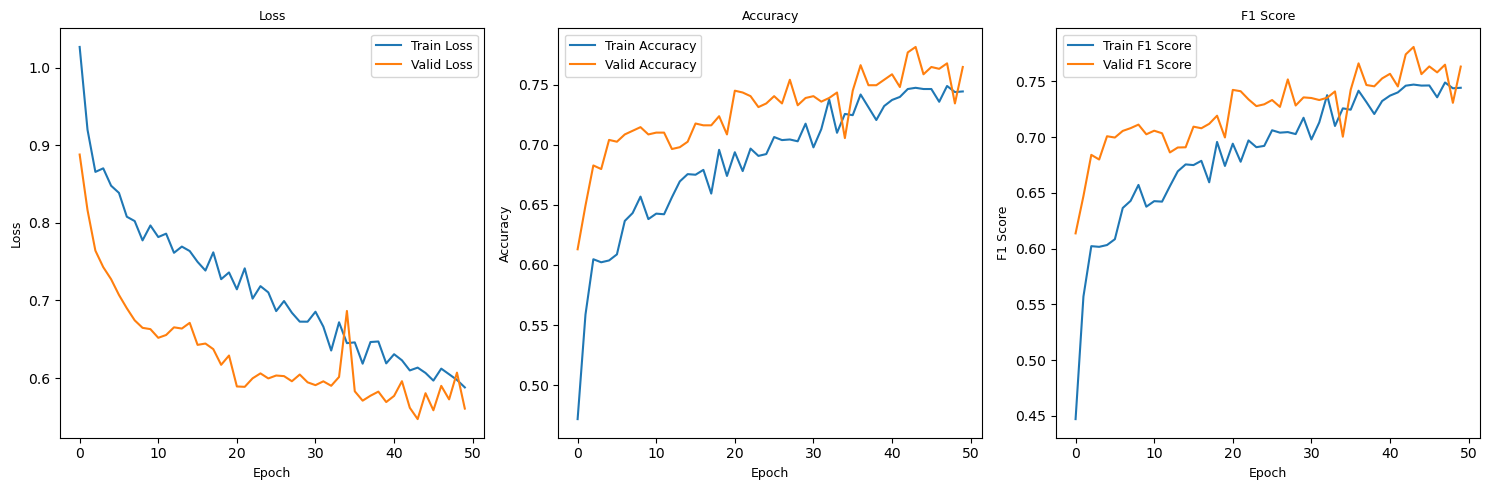

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       219
           1       0.74      0.72      0.73       220
           2       0.79      0.77      0.78       220

    accuracy                           0.78       659
   macro avg       0.78      0.78      0.78       659
weighted avg       0.78      0.78      0.78       659

              precision    recall  f1-score   support

           0       0.75      0.82      0.79       220
           1       0.75      0.71      0.73       219
           2       0.74      0.71      0.72       220

    accuracy                           0.75       659
   macro avg       0.75      0.75      0.75       659
weighted avg       0.75      0.75      0.75       659



In [5]:
num_class = 3
num_epochs = 50
lr = 1e-5

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Training
model = DenseNet121(num_class).to(device)
trainer = ModelTrainer()
best_val_file = trainer.train(model, train_loader, valid_loader, model_save_directory, num_epochs=num_epochs, lr=lr)

# Validation
#model = DenseNet121(num_class).to(device)
model.load_state_dict(torch.load(best_val_file))

test_predictions, test_outputs = trainer.evaluate(model, valid_loader)
df_valid["pred"] = test_predictions
df_valid["proba"] = test_outputs
df_valid.to_csv(df_valid_filepath, index=False)

# Test
test_predictions, test_outputs = trainer.evaluate(model, test_loader)
df_test["pred"] = test_predictions
df_test["proba"] = test_outputs
df_test.to_csv(df_test_filepath, index=False)